In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

# 1. Product dataset

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\archive (2)\ev_model_spec.csv')
df.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Model Name                   39 non-null     object
 1   Price                        39 non-null     int64 
 2   Riding Range (km)            39 non-null     int64 
 3   Top Speed (kmph)             39 non-null     int64 
 4   Weight (kg)                  39 non-null     int64 
 5   Battery Charging Time (hrs)  39 non-null     int64 
 6   Rated Power (W)              39 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.3+ KB


In [33]:
df.isnull().sum()

Model Name                     0
Price                          0
Riding Range (km)              0
Top Speed (kmph)               0
Weight (kg)                    0
Battery Charging Time (hrs)    0
Rated Power (W)                0
Score                          0
dtype: int64

Define Performance Criteria:

Riding Range: Higher is better.

Top Speed: Higher is better.

Weight: Lower is better.

Battery Charging Time: Lower is better.

Rated Power: Depending on context, higher power might indicate better performance.

In [3]:
numcols=df.select_dtypes(include=['int64'])

In [4]:
def scaling(dataframe,column):
    normalizer=MinMaxScaler()
    df_normalized=normalizer.fit_transform(dataframe[column.columns])
    finald= pd.DataFrame(df_normalized, columns=column.columns)
    return finald

In [5]:
scaledframe=scaling(df, numcols)
scaledframe.head(10)

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,0.446619,0.562963,0.307692,0.340659,0.571429,0.180952
1,0.124496,0.000000,0.000000,0.384615,1.000000,0.000000
2,0.090707,0.000000,0.000000,0.318681,1.000000,0.000000
3,0.378258,0.555556,0.307692,0.230769,0.571429,0.180952
4,0.702379,0.488889,0.714286,0.538462,0.714286,0.523810
5,0.666650,0.333333,0.417582,0.813187,0.285714,0.676190
6,0.337669,0.555556,0.384615,0.076923,0.428571,0.428571
7,0.099080,0.185185,0.274725,0.439560,0.714286,0.104762
8,0.414553,0.296296,0.439560,0.384615,0.142857,0.238095
9,0.192908,0.111111,0.000000,0.087912,0.142857,0.000000


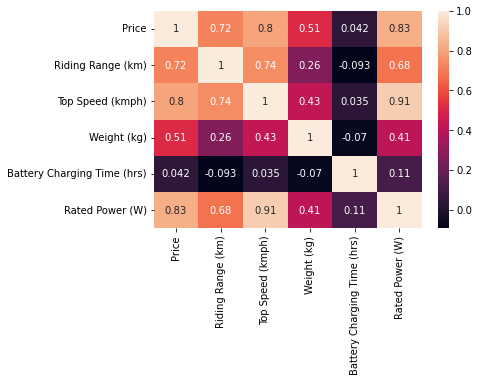

In [7]:
corMat=scaledframe.corr()
sns.heatmap(corMat, annot=True)
plt.show()

In [15]:
def weightedsum(weights, dataframe):
    score = sum(weights[feature] * dataframe[feature] for feature in weights)

    return score

weights = {
    'Riding Range (km)': 0.3,
    'Top Speed (kmph)': 0.3,
    'Weight (kg)': -0.2,  
    'Battery Charging Time (hrs)': -0.2,  
    'Rated Power (W)': 0.2
}

scaledframe['Score'] = weightedsum(weights,scaledframe)


In [16]:
scaledframe.head(3)

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),Score
0,0.446619,0.562963,0.307692,0.340659,0.571429,0.180952,0.114969
1,0.124496,0.000000,0.000000,0.384615,1.000000,0.000000,-0.276923
2,0.090707,0.000000,0.000000,0.318681,1.000000,0.000000,-0.263736


In [17]:
scaledframe['Model Name'] = df['Model Name'].values

In [18]:
scaledframe.head(5)

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),Score,Model Name
0,0.446619,0.562963,0.307692,0.340659,0.571429,0.180952,0.114969,Ampere Magnus EX
1,0.124496,0.000000,0.000000,0.384615,1.000000,0.000000,-0.276923,Ampere Magnus Pro
2,0.090707,0.000000,0.000000,0.318681,1.000000,0.000000,-0.263736,Ampere REO
3,0.378258,0.555556,0.307692,0.230769,0.571429,0.180952,0.134725,Ampere Zeal
4,0.702379,0.488889,0.714286,0.538462,0.714286,0.523810,0.215165,Ather 450X


In [20]:
best_model = scaledframe.loc[scaledframe['Score'].idxmax()]

In [21]:
best_model

Price                             0.73849
Riding Range (km)                0.925926
Top Speed (kmph)                      1.0
Weight (kg)                      0.725275
Battery Charging Time (hrs)      0.571429
Rated Power (W)                       1.0
Score                            0.518437
Model Name                     OLA S1 Pro
Name: 29, dtype: object

### Checking what difference occurs if correlated columns are dropped. 


In [22]:
##df1=scaledframe.copy()
##df1.head(4)

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),Score,Model Name
0,0.446619,0.562963,0.307692,0.340659,0.571429,0.180952,0.114969,Ampere Magnus EX
1,0.124496,0.000000,0.000000,0.384615,1.000000,0.000000,-0.276923,Ampere Magnus Pro
2,0.090707,0.000000,0.000000,0.318681,1.000000,0.000000,-0.263736,Ampere REO
3,0.378258,0.555556,0.307692,0.230769,0.571429,0.180952,0.134725,Ampere Zeal


In [23]:
#upper = corMat.where(np.triu(np.ones(corMat.shape), k=1).astype(bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.90)] 
#df1.drop(to_drop, axis=1, inplace=True)

In [24]:
#df1.head(4)

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Score,Model Name
0,0.446619,0.562963,0.307692,0.340659,0.571429,0.114969,Ampere Magnus EX
1,0.124496,0.000000,0.000000,0.384615,1.000000,-0.276923,Ampere Magnus Pro
2,0.090707,0.000000,0.000000,0.318681,1.000000,-0.263736,Ampere REO
3,0.378258,0.555556,0.307692,0.230769,0.571429,0.134725,Ampere Zeal


In [25]:
#df1=df1.drop(columns='Score', axis=1)

In [26]:
#df1.head(3)

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Model Name
0,0.446619,0.562963,0.307692,0.340659,0.571429,Ampere Magnus EX
1,0.124496,0.000000,0.000000,0.384615,1.000000,Ampere Magnus Pro
2,0.090707,0.000000,0.000000,0.318681,1.000000,Ampere REO


In [27]:
#weights1= {
    #'Riding Range (km)': 0.3,
    #'Top Speed (kmph)': 0.3,
    #'Weight (kg)': -0.2,  
    #'Battery Charging Time (hrs)': -0.2,  
#}
#df1['Score']=weightedsum(weights1, df1)

In [31]:
#best_model1 = df1.loc[df1['Score'].idxmax()]

In [32]:
#best_model1

Price                             0.73849
Riding Range (km)                0.925926
Top Speed (kmph)                      1.0
Weight (kg)                      0.725275
Battery Charging Time (hrs)      0.571429
Model Name                     OLA S1 Pro
Score                            0.318437
Name: 29, dtype: object

### Same results even after dropping correlated columns. 

## *Result* : Best model name- OLA S1 PRO